## GRIP @ The Sparks Foundation

### Task-1: To Explore Supervised Machine Learning

#### Author: Yogiraj Dalvi

In this regression task we are going to predict the percentage of an student based on the no of Study hours.
This is a simple regression task as it involves just 2 variables.

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Reading the data

In [3]:
prodata = pd.read_csv("Students_Marks_Data.csv")
prodata.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
prodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   18 non-null     float64
 1   Scores  18 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


In [5]:
prodata.describe()

,Hours,Scores
count,18.000000,18.000000
mean,5.094444,51.777778
std,2.721477,27.333572
min,1.100000,17.000000
25%,2.825000,27.750000
50%,4.800000,44.500000
75%,7.775000,79.500000
max,9.200000,95.000000


## DATA VISUALIZATION

Plotting a graph of our data so that it will give us clear insights about data.

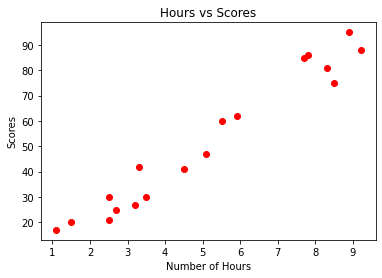

In [6]:
plt.scatter(prodata['Hours'], prodata['Scores'], color='red')
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

**Observation:** We can clearly observe that Number of Hours studies is linearly related to the scores of the student.

## Splitting the data into for training and testing usng sklearn model

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(prodata['Hours'].values.reshape(-1,1), prodata['Scores'], test_size = 0.2, random_state = 42)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14, 1), (14,), (4, 1), (4,))

## Training the Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Plotting the predicted Line

In [12]:
coefficient = model.coef_
intercept = model.intercept_

# Since, y = m*x + c
line = (prodata['Hours'].values * coefficient) + intercept

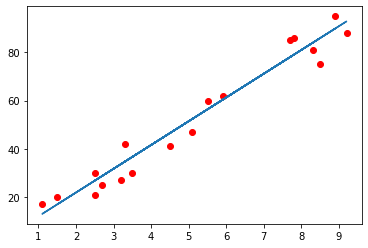

In [13]:
plt.scatter(prodata.Hours, prodata.Scores, color='red')
plt.plot(prodata.Hours, line)
plt.show()

In [14]:
predt = model.predict(X_test)
predt

array([26.82433759, 52.45777555, 84.00662227, 16.96532299])

## Comparing the actual values against the predicted values

In [15]:
predt_compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':predt}) 
predt_compare

,Actual Values,Predicted Values
0,21,26.824338
1,47,52.457776
8,81,84.006622
5,20,16.965323


## Evaluating the Model

In [16]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, predt)) 
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, predt))

Mean Absolute Error:  4.33085310400107
Mean Squared Error:  20.489816071106763


**What will be predicted score if a student study for 9.25 hrs in a day?**

In [17]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"The predicted score of a student who studied 9.25 hrs a day will be {model.predict(hours)[0]}.")

The predicted score of a student who studied 9.25 hrs a day will be 93.37268613893278.
